In [2]:
import advertools as adv
import pandas as pd
from ua_parser import user_agent_parser
import pyarrow.parquet as pq
import pyarrow
from ipywidgets import interact
import ua_parser
pd.options.display.max_columns = None

for p in [adv, pd, pyarrow]:
    print(f'{p.__name__:-<14}v{p.__version__}')

import csv

advertools----v0.13.4
pandas--------v1.5.3
pyarrow-------v12.0.1


In [3]:
csv_file_path = 'log_file.csv'
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Read and print the first 10 rows
    for row_num, row in enumerate(csv_reader):
        if row_num >= 10:
            break
        print(row)

['87.116.74.253 - - [28/Feb/2022:14:04:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML', ' like Gecko) Chrome/98.0.4758.109 Safari/537.36"']
['91.196.124.220 - - [28/Feb/2022:14:04:47 +0200] "POST /wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625" "WordPress/5.9.1; https://nargile.bg"']
['91.196.124.220 - - [28/Feb/2022:14:06:45 +0200] "POST /wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000" "WordPress/5.9.1; https://nargile.bg"']
['87.116.74.253 - - [28/Feb/2022:14:06:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW

In [4]:
adv.logs_to_df(
    log_file='log_file.csv',
    output_file='output_file.parquet',
    errors_file='errors_file.txt',
    log_format='combined')

ValueError: The file 'output_file.parquet' already exists. Please rename it, delete it, or choose another file name/path.

In [6]:
logs_df = pd.read_parquet('output_file.parquet')
logs_df.columns


Index(['client', 'userid', 'datetime', 'method', 'request', 'status', 'size',
       'referer', 'user_agent'],
      dtype='object')

In [7]:
a= logs_df.head(9000)

In [8]:
a['datetime'] = pd.to_datetime(a['datetime'],
                                     format='%d/%b/%Y:%H:%M:%S %z')

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_6472\3798945453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['datetime'] = pd.to_datetime(a['datetime'],


In [15]:
a.head()

,client,userid,datetime,method,request,status,size,referer,user_agent
0,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/wc/wooc...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
1,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/libs/magnific-p...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
2,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/wc/acti...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
3,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/element...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
4,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/global/...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...


In [10]:
a['datetime'].max() - a['datetime'].min()

Timedelta('0 days 01:22:10')

In [11]:
#total avg size
avg_size=  a['size'].mean()
print("Average size :", avg_size)

Average size : 35993.98759553941


In [14]:
top_ten_sizes = a['size'].nlargest(10)

print("Top ten values of size:") 
print(top_ten_sizes)

Top ten values of size:
2563    718184.0
207     485521.0
425     485521.0
624     485521.0
824     485521.0
1098    485521.0
2251    485521.0
2667    485521.0
2904    485521.0
4242    485521.0
Name: size, dtype: float64


In [16]:
most_common = a['status'].value_counts().idxmax()

print("Most occurred status:", most_common)

Most occurred status: 200


In [17]:
value_counts = a['status'].value_counts()

print("Number of times each status has occurred:")
print(value_counts)

Number of times each status has occurred:
200    7960
304     776
404     160
301      58
500      38
401       4
406       3
302       1
303       0
400       0
201       0
403       0
405       0
421       0
206       0
502       0
503       0
Name: status, dtype: int64


2023-08-20 17:35:08,113 | INFO | category.py:234 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-08-20 17:35:08,120 | INFO | category.py:234 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


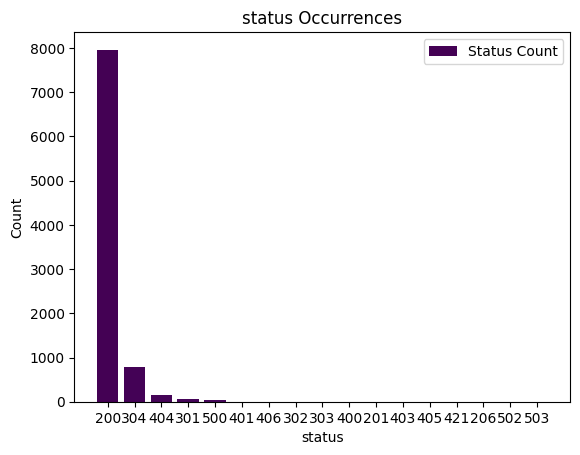

In [21]:
import matplotlib.pyplot as plt

value_counts = a['status'].value_counts()

# Convert the value counts to a DataFrame for plotting
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['status', 'Count']

# Create a bar plot
#plt.bar(value_counts_df['status'], value_counts_df['Count'])
plt.bar(value_counts.index, value_counts.values, color=plt.cm.viridis(range(len(value_counts))))
plt.xlabel('status')
plt.ylabel('Count')
plt.title('status Occurrences')
plt.legend(['Status Count'])
plt.show()

In [25]:
top_clients = a['client'].value_counts().head(5)

print("Top 5 most occurred clients:")
print(top_clients)

Top 5 most occurred clients:
212.5.158.63     864
149.62.208.7     640
212.5.158.18     608
87.121.11.82     500
212.39.89.241    477
Name: client, dtype: int64


2023-08-20 17:49:10,194 | INFO | category.py:234 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-08-20 17:49:10,194 | INFO | category.py:234 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


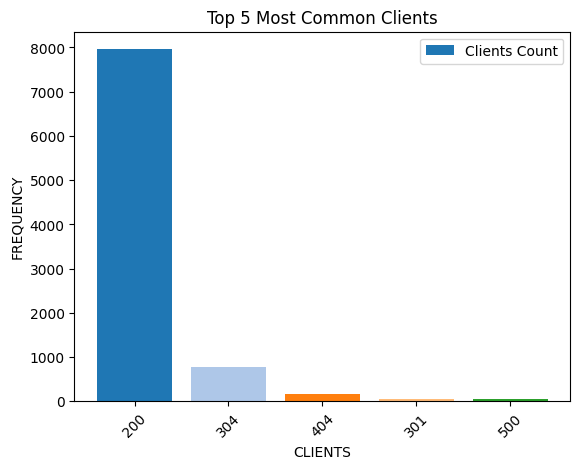

In [30]:
import numpy as np

client_counts = a['client'].value_counts()

# Select the top 5 most common objects
top_clients = value_counts.head(5)

# Generate a range of colors for the objects
colors = plt.cm.tab20(np.arange(len(top_clients)))

# Create a multicolor bar plot
plt.bar(top_clients.index, top_clients.values, color=colors)

# Add legends and labels
plt.xlabel('CLIENTS')
plt.ylabel('FREQUENCY')
plt.title('Top 5 Most Common Clients')
plt.legend(['Clients Count'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



In [28]:
top_req = a['request'].value_counts().head(5)

print("Top 5 most occurred reqests:")
print(top_req)

Top 5 most occurred reqests:
/wp-admin/admin-ajax.php                                             265
/wp-content/uploads/2021/05/HLGN-Logo.png                            159
/                                                                     97
/?wc-ajax=get_refreshed_fragments                                     64
/?nitroWebhook=cache_ready&token=fdccd0f43d6699b0ad7852228297d999     44
Name: request, dtype: int64


2023-08-20 17:47:53,612 | INFO | category.py:234 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-08-20 17:47:53,617 | INFO | category.py:234 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


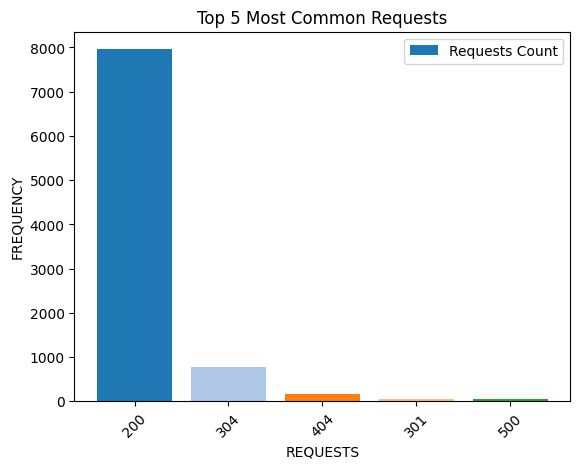

In [29]:
req_counts = a['request'].value_counts()

# Select the top 5 most common objects
top_req = value_counts.head(5)

# Generate a range of colors for the objects
colors = plt.cm.tab20(np.arange(len(top_req)))

# Create a multicolor bar plot
plt.bar(top_req.index, top_req.values, color=colors)

# Add legends and labels
plt.xlabel('REQUESTS')
plt.ylabel('FREQUENCY')
plt.title('Top 5 Most Common Requests')
plt.legend(['Requests Count'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [31]:
top_ref = a['referer'].value_counts().head(5)

print("Top 5 most occurred referer:")
print(top_ref)

Top 5 most occurred referer:
https://nargile.bg/                                                                  648
https://nargile.bg/category/nargileta/                                               357
https://nargile.bg/category/chashki-za-nargile/page/2/                               285
https://nargile.bg/category/aksesoari-za-nargile/                                    268
https://nargile.bg/product/moze-shisha-breeze-two-wavy-yellow-nargile-s-vkl-vaza/    265
Name: referer, dtype: int64


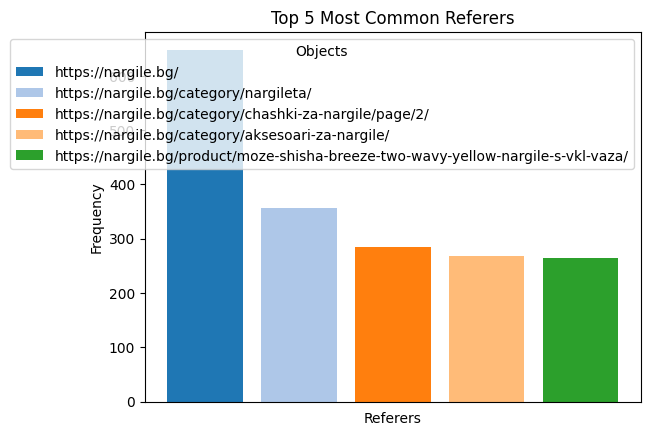

In [39]:


colors = plt.cm.tab20(np.arange(len(top_ref)))
bars = plt.bar(top_ref.index, top_ref.values, color=colors)
plt.xticks([])
legend_labels = []
for bar, label in zip(bars, top_ref.index):
    legend_labels.append(bar)
    bar.set_label(label)
    
plt.legend(handles=legend_labels, title='Objects', loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Referers')
plt.title('Top 5 Most Common Referers')


plt.show()


In [40]:
top_agents = a['user_agent'].value_counts().head(5)

print("Top 5 most occurred user agents:")
print(top_agents)

Top 5 most occurred user agents:
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36                                                                                                        1236
Mozilla/5.0 (iPhone; CPU iPhone OS 15_3_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.3 Mobile/15E148 Safari/604.1                                                                                  902
Mozilla/5.0 (iPhone; CPU iPhone OS 15_3_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 Instagram 224.1.0.15.115 (iPhone13,3; iOS 15_3_1; en_BG; en-GB; scale=3.00; 1170x2532; 353721074) NW/3     640
Mozilla/5.0 (Linux; Android 12; SM-G990B) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.58 Mobile Safari/537.36                                                                                                  608
Mozilla/5.0 (Linux; Android 11; SM-A705FN) AppleWebKit/537.36 (KHTML, like 

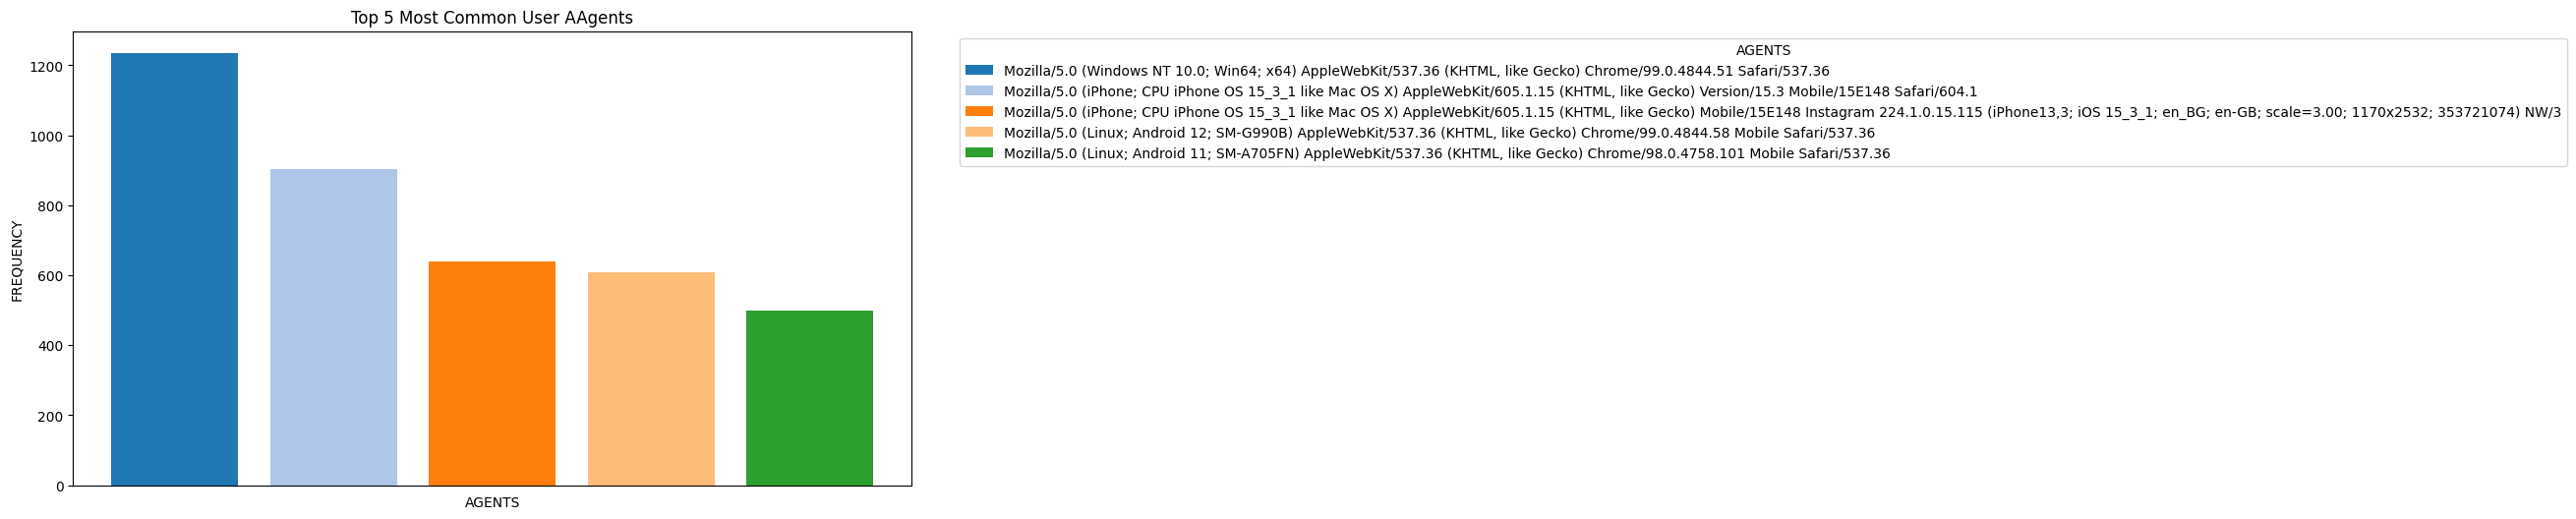

In [46]:
plt.figure(figsize=(11, 6))
colors = plt.cm.tab20(np.arange(len(top_agents)))
bars = plt.bar(top_agents.index, top_agents.values, color=colors)
plt.xticks([])
legend_labels = []
for bar, label in zip(bars, top_agents.index):
    legend_labels.append(bar)
    bar.set_label(label)
    
plt.legend(handles=legend_labels, title='AGENTS', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('FREQUENCY')
plt.xlabel('AGENTS')
plt.title('Top 5 Most Common User AAgents')


plt.show()

In [47]:
a['hour'] = a['datetime'].dt.hour
a['minute'] = a['datetime'].dt.minute

# Group the data by hour and minute and count occurrences
traffic_counts = a.groupby(['hour', 'minute']).size()

# Find the time at which maximum traffic occurred
max_traffic_time = traffic_counts.idxmax()

print("Max traffic occurred at:", max_traffic_time)







Max traffic occurred at: (17, 42)


C:\Users\Microsoft\AppData\Local\Temp\ipykernel_6472\1250861356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['hour'] = a['datetime'].dt.hour
C:\Users\Microsoft\AppData\Local\Temp\ipykernel_6472\1250861356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['minute'] = a['datetime'].dt.minute
